In [32]:
import pyNN.spiNNaker as sim

class Pynn_Net():
    sim.setup(1.0)
   
    def __init__(self, scale, CE, CI, weight_excitatory, weight_inhibitory, delay, nrec, extra_kernel_params=None):
        self.scale = scale
        self.NE = int(9000 * scale)
        self.NI = int(2250 * scale)
        self.CE = int(CE)
        self.CI = int(CI)

        self.weight_excitatory = weight_excitatory
        self.weight_inhibitory = weight_inhibitory

        self.delay = delay

        self.nrec = min(nrec, self.NE)
    
    def build_network(self):
    #input and populations
    #!!change input rate0
        self.input_poisson = sim.Population(1, sim.SpikeSourcePoisson(rate = self.scale*1000000), label = 'input')
        #input_in = sim.Population(self.NI/3, sim.SpikeSourcePoisson, label = 'input_in')
        self.pop1_ex=sim.Population(self.NE, sim.IF_curr_exp())
        self.pop1_in=sim.Population(self.NI, sim.IF_curr_exp())
        #pop2=sim.Population((self.NE/3)+(self.NI/3), sim.IF_curr_exp())

    #record spikes
        self.sample_ex = self.pop1_ex.sample(self.nrec)
        self.sample_ex.record(["spikes"])
        #self.sample_in = self.pop1_in.sample(self.nrec)
        #self.sample_in.record(["spikes"])
        
        self.connect_pops()

    def connect_pops(self):
    #connect populations
        sim.Projection(self.input_poisson, self.pop1_ex, sim.AllToAllConnector(), synapse_type=sim.StaticSynapse(weight=self.weight_excitatory, delay=self.delay))
        sim.Projection(self.input_poisson, self.pop1_in, sim.AllToAllConnector(), synapse_type=sim.StaticSynapse(weight=self.weight_excitatory, delay=self.delay))
        sim.Projection(self.pop1_ex, self.pop1_in, sim.FixedNumberPreConnector(self.CE, with_replacement = True, allow_self_connections = False), synapse_type=sim.StaticSynapse(weight=self.weight_excitatory, delay=self.delay))
        sim.Projection(self.pop1_ex, self.pop1_ex, sim.FixedNumberPreConnector(self.CE, with_replacement = True, allow_self_connections = False), synapse_type=sim.StaticSynapse(weight=self.weight_excitatory, delay=self.delay))
        sim.Projection(self.pop1_in, self.pop1_in, sim.FixedNumberPreConnector(self.CI, with_replacement = True, allow_self_connections = False), synapse_type=sim.StaticSynapse(weight=self.weight_inhibitory, delay=self.delay))
        sim.Projection(self.pop1_in, self.pop1_ex, sim.FixedNumberPreConnector(self.CI, with_replacement = True, allow_self_connections = False), synapse_type=sim.StaticSynapse(weight=self.weight_inhibitory, delay=self.delay))

    def run_simulation(self):
        self.build_network()
        sim.run(200)
        #spikes1=self.sample_ex.get_data(["spikes"]).segments[0].spiketrains
        #spikes2=self.sample_in.get_data(["spikes"]).segments[0].spiketrains
        average_rate = self.sample_ex.mean_spike_count()
        sim.end
        
        return average_rate

if __name__ == "__main__":    
#extract data

    net = Pynn_Net(scale=0.01, 
                                   CE=50, 
                                   CI=10, 
                                   weight_excitatory=15, 
                                   weight_inhibitory=-100, 
                                   delay=5,
                                   nrec=5
                                   )

    spikes1, spikes2 = net.run_simulation()
    
    """spikes1=pop1.get_data(["spikes"]).segments[0].spiketrains
    v1 = pop1.get_data(["spikes","v"]).segments[0].filter(name='v')[0]

    spikes2=pop2.get_data(["spikes", "v"]).segments[0].spiketrains
    v2 = pop2.get_data(["spikes","v"]).segments[0].filter(name='v')[0]*/



    from pyNN.utility.plotting import Figure, Panel

    Figure(Panel(spikes1))
    print(v1)

    Figure(Panel(spikes2))
    print(v2)"""

2025-01-28 15:20:38 WARNING: Calling setup a second time causes the previous simulator to be stopped and cleared.
2025-01-28 15:20:38 INFO: Caching data for segment -1
Getting spikes for AbstractPopulationVertex_1
|0%                          50%                         100%|
2025-01-28 15:20:38 INFO: Caching data for segment -1
Getting spikes for AbstractPopulationVertex_2
|0%                          50%                         100%|
2025-01-28 15:20:38 INFO: Resetting
2025-01-28 15:20:38 WARNING: 1 packets from AbstractPopulationVertex_1:0:89 on 4, 4, 2 were dropped from the input buffer, because they arrived too late to be processed in a given time step. Try increasing the time_scale_factor located within the .spynnaker.cfg file or in the pynn.setup() method.
2025-01-28 15:20:38 WARNING: A maximum of 2 background tasks were queued on AbstractPopulationVertex_1:0:89 on 4, 4, 2.  Try increasing the time_scale_factor located within the .spynnaker.cfg file or in the pynn.setup() method

['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


2025-01-28 15:20:41 INFO: Time 0:00:03.125277 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2025-01-28 15:20:53 INFO: Time 0:00:12.346298 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2025-01-28 15:20:59 INFO: Time 0:00:05.384076 taken by SpYNNakerSplitterPartitioner
Created spalloc job 674774
2025-01-28 15:20:59 INFO: Created spalloc job 674774
Job has been queued by the spalloc server.
2025-01-28 15:20:59 INFO: Job has been queued by the spalloc server.
Waiting for board power commands to complete.
2025-01-28 15:21:00 INFO: Waiting for board power commands to complete.
2025-01-28 15:21:09 INFO: Time 0:00:10.064627 taken by SpallocAllocator
2025-01-28 15:21:09 INFO: Creating transceiver for 10

In [17]:
spikes1=net.pop1_ex.get_data(["spikes"]).segments[0].spiketrains

Getting spikes for AbstractPopulationVertex_1
|0%                          50%                         100%|


In [33]:
net.sample_ex.mean_spike_count(),net.sample_in.mean_spike_count()

2025-01-28 15:22:02 INFO: get_spike_counts is inefficient as it just counts the results of get_datas('spikes')
Getting spikes for AbstractPopulationVertex_1
|0%                          50%                         100%|
2025-01-28 15:22:02 INFO: get_spike_counts is inefficient as it just counts the results of get_datas('spikes')
Getting spikes for AbstractPopulationVertex_2
|0%                          50%                         100%|


(32.4, 37.8)

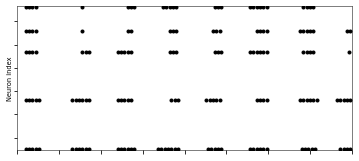

In [34]:
%matplotlib inline
from pyNN.utility.plotting import Figure, Panel

Figure(Panel(spikes1))


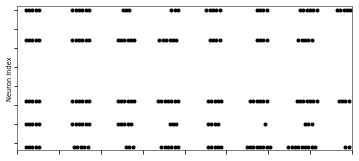

In [35]:
Figure(Panel(spikes2))

In [36]:
net.sample_ex.get_spike_counts(), net.sample_in.get_spike_counts()

2025-01-28 15:23:47 INFO: get_spike_counts is inefficient as it just counts the results of get_datas('spikes')
Getting spikes for AbstractPopulationVertex_1
|0%                          50%                         100%|
2025-01-28 15:23:47 INFO: get_spike_counts is inefficient as it just counts the results of get_datas('spikes')
Getting spikes for AbstractPopulationVertex_2
|0%                          50%                         100%|


({36: 39, 66: 24, 15: 44, 57: 29, 76: 26},
 {2: 43, 16: 36, 20: 37, 8: 46, 5: 27})